# TUGAS 4 - KECERDASAN KOMPUTASIONAL

## ANN Classification

### Nama    : Anggito Anju Hartawan Manalu
### Kelas   : Kecerdasan Komputasional (KK) F
### NRP     : 5025201216

### Penjelasan Tugas

Pada tugas kali ini saya akan mengimplementasikan ANN Classification pada Python. Disini saya akan menggunakan dataset yang sudah tersedia pada modul sklearn. Saya akan menggunakan dataset Wine Recognition.

# 1. Import Library

Pertama-tama kita harus meng-import library yang kita butuhkan.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# 2. Import Dataset

Kemudian kita harus meng-import dataset yang nantinya akan kita klasifikasikan

In [2]:
# Load Sklearn Dataset
from sklearn import datasets

rawData = datasets.load_wine()

# 3. Eksplorasi Dataset

Kita akan mengubah raw data yang sebelumnya berbentuk dictionary menjadi bentuk dataframe dan akan melakukan eksplorasi data pada dataset ini.

In [3]:
df = pd.DataFrame(rawData.data, columns=rawData.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# 4. Tambahkan Label

Kita harus melengkapi dataframe dengan label yang telah tersedia pada dataset yang sebelumnya berupa dictionary. Kita akan membuat kolom bernama 'label' untuk menyimpan data label tersebut.

In [4]:
print("Besar Data : ", df.shape)
print("Fitur : ", df.columns)
print("Label/Target : ", rawData.target)

Besar Data :  (178, 13)
Fitur :  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Label/Target :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
df['label'] = rawData.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


5. Visualisasi Class

Kita mengetahui bahwa kita akan meiliki3 class/ 3 label untuk dataset ini. Kita akan melakukan visualisasi besaran dari tiap Class yang tersedia 

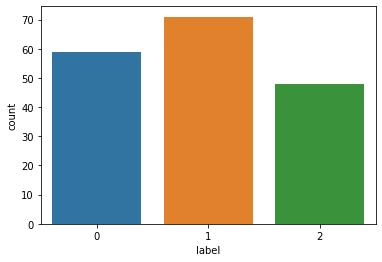

In [6]:
sns.countplot(df['label'], label="Count")

# 6. Cek Korelasi Fitur

Selanjutnya kita akan mengecek korelasi 13 fitur yang tersedia pada dataset kita

Text(0.5, 1.0, 'Feature Correlation')

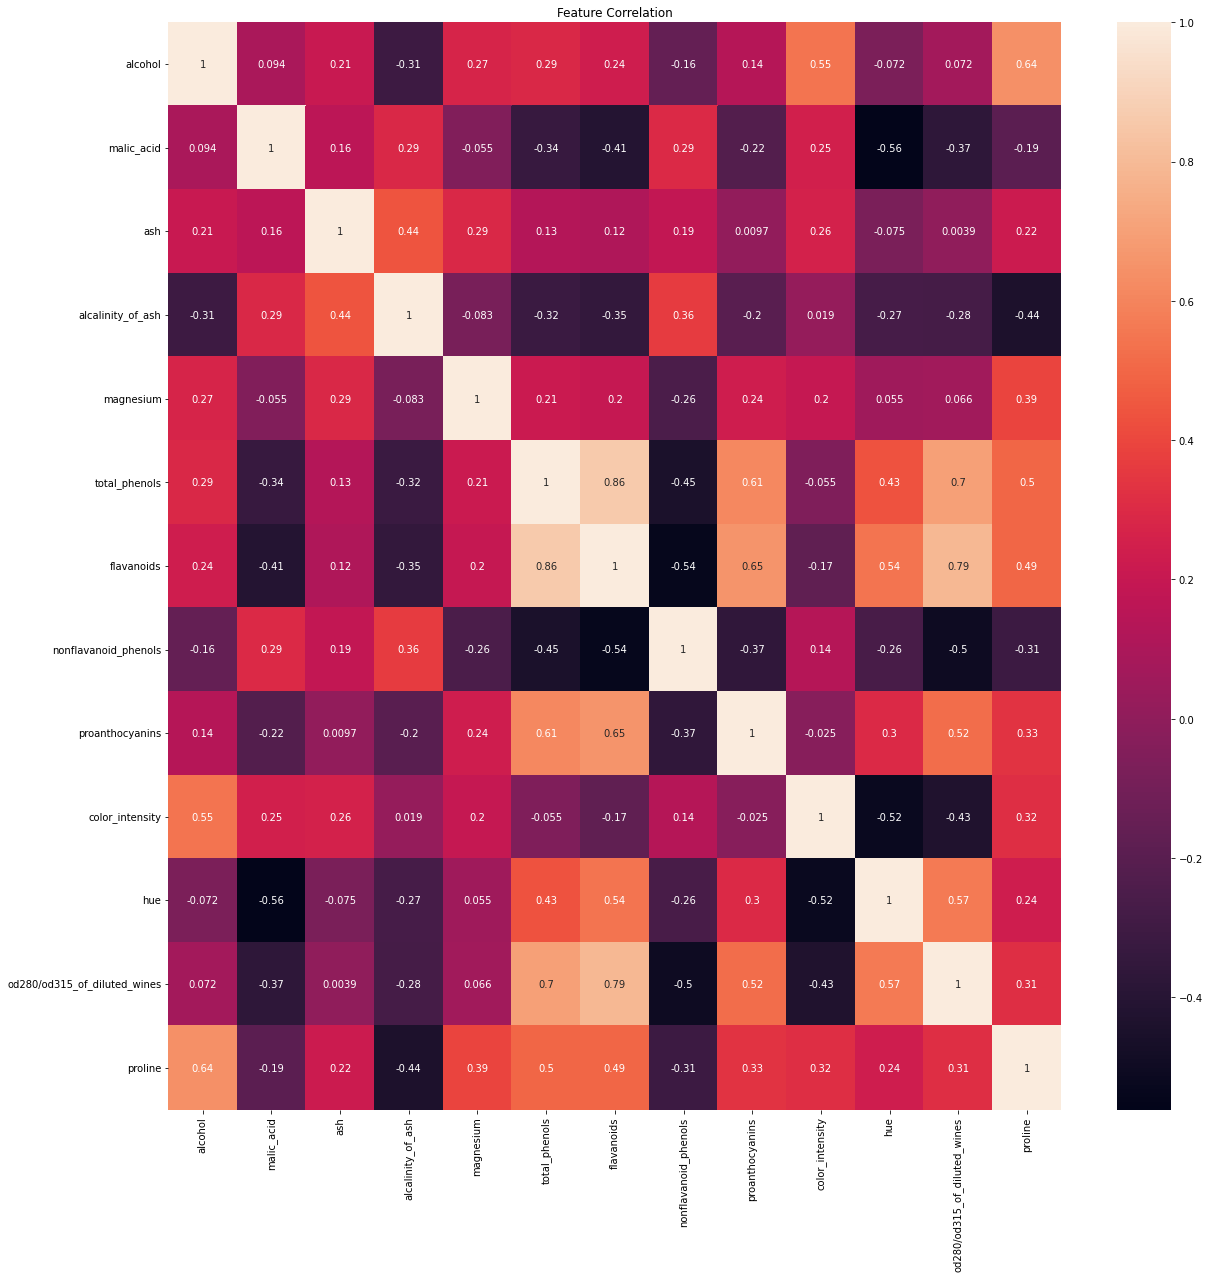

In [7]:
corr = df.drop(['label'], axis=1).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, annot=True)
plt.title("Feature Correlation")

# 7. Pisahkan Traning Data dan Test Data

Pada kasus ini, kita akan menggunakan 25% test data dan 75% training data. Jangan lupa untuk memisahkan x (fitur data) dan y (label data)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), df['label'], test_size=0.25, random_state=42)

# 8. Normalisasi Data

Lakukan normalisasi data untuk mengurangi kemungkinan Underfitting maupun Overfitting

In [9]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# 9. Buat Model ANN



In [10]:
# Inisialisasi ANN

ann = tf.keras.models.Sequential()

# 10. Buat Hidden Layers

In [11]:
# Kita akan menggunakan 6 neuron pada hidden layer pertama
# Dan menggunakan fungsi aktivasi relu (rectified linear unit)

ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [12]:
# Kita akan menggunakan aturan yang sama pada hidden layer kedua kita

ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

# 11. Buat Output Layer

Kita akan menggunakan fungsi aktivasi softmax untuk output layer kita. Hal ini dikarenakan dataset ini bukan merupakan binary classification problem. Jadi lebih baik jika menggunakan fungsi aktivasi softmax.

In [13]:
# Kita juga membutuhkan 3 neuron untuk 3 kategori hasil yang berbeda

ann.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# 12. Compile ANN

Kita akan menggunakan fungsi loss 'categorical_crossentropy' dan bukan 'binary_crossentropy' karena lagi-lagi problem ini bukan merupakan binary classification

In [14]:
ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# 13. Fitting ANN

Kita akan mencoba menggunakan 100 epochs/perulangan forward dan back propagation

In [15]:
# Ubah series dari y_train menjadi numpy array

pd.Series.to_numpy(y_train)

array([0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1,
       1])

In [16]:
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 1.1323 - accuracy: 0.3835
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1263 - accuracy: 0.3759
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.1222 - accuracy: 0.3684
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1171 - accuracy: 0.3759
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1132 - accuracy: 0.3910
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1090 - accuracy: 0.4060
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 1.1049 - accuracy: 0.4436
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1003 - accuracy: 0.4436
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 1.0948 - accuracy: 0.4586
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0895 - accuracy: 0.4436
Epoch 11/100
5/5 [===========